In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

In [2]:
with open("D:/Desktop/AD_Dataset/Gene_expression/GSE33000_series_matrix.txt", "r") as f:
    lines = f.readlines()

# Find the starting index of the series matrix table
start_idx = lines.index("!series_matrix_table_begin\n") + 1 

# Extract only the gene expression table
data_lines = [line.strip().split("\t") for line in lines[start_idx:]]

# Convert to DataFrame
df = pd.DataFrame(data_lines[1:], columns=data_lines[0])  # First row as column names

# Save to CSV
df.to_csv("D:/Desktop/AD_Dataset/Gene_expression/GSE33000_series_matrix.csv", index=False)

print("✅ Conversion complete: GSE33000_series_matrix.csv saved!")




✅ Conversion complete: GSE33000_series_matrix.csv saved!


In [3]:
import pandas as pd

# Load the CSV file
data= pd.read_csv("D:/Desktop/AD_Dataset/Gene_expression/GSE33000_series_matrix.csv")

# Display the first 5 rows
data.head()

C:\Users\shaha\AppData\Local\Temp\ipykernel_12988\4191840629.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data= pd.read_csv("D:/Desktop/AD_Dataset/Gene_expression/GSE33000_series_matrix.csv")


,"""ID_REF""","""GSM1423780""","""GSM1423781""","""GSM1423782""","""GSM1423783""","""GSM1423784""","""GSM1423785""","""GSM1423786""","""GSM1423787""","""GSM1423788""",...,"""GSM1424394""","""GSM1424395""","""GSM1424396""","""GSM1424397""","""GSM1424398""","""GSM1424399""","""GSM1424400""","""GSM1424401""","""GSM1424402""","""GSM1424403"""
0,10019475365,-0.016184,0.027599,-0.089661,-0.020493,-0.051699,0.075485,-0.046606,0.111980,0.018505,...,0.0844,0.1040,0.2140,0.00285,0.0945,0.1220,-0.0258,0.0186,0.14300,0.1600
1,10019481149,-0.017105,-0.023574,0.044863,0.003438,-0.064108,-0.053226,-0.071823,-0.051699,-0.024906,...,0.0409,0.0761,0.0633,0.03090,0.0319,0.0390,0.0897,0.1160,-0.00317,0.0359
2,10019495284,0.077440,-0.058746,-0.120759,0.072692,-0.051002,-0.183919,-0.074997,-0.090709,0.049640,...,-0.1360,-0.0547,-0.1920,-0.11200,-0.1230,-0.1520,0.5390,0.2280,-0.02580,-0.0968
3,10019687586,0.033595,0.032914,-0.030928,-0.033051,-0.049156,-0.011204,0.072451,0.126576,0.078031,...,-0.0120,0.0533,-0.0416,-0.01530,0.0483,0.0127,0.0419,0.1290,0.00619,-0.0360
4,10019713746,-0.001819,0.032487,-0.015073,-0.010303,0.063070,0.113860,-0.055590,0.127236,0.056135,...,0.1140,0.0270,0.2590,0.10100,0.2000,0.1170,-0.0359,0.0833,0.19500,0.1530


In [4]:
data.shape

(39281, 625)

In [5]:
unique_count = data['"ID_REF"'].nunique()
print(f"Number of unique values: {unique_count}")

Number of unique values: 39281


In [6]:
data.columns = data.columns.str.replace('"', '').str.strip()

In [7]:
data.head()

,ID_REF,GSM1423780,GSM1423781,GSM1423782,GSM1423783,GSM1423784,GSM1423785,GSM1423786,GSM1423787,GSM1423788,...,GSM1424394,GSM1424395,GSM1424396,GSM1424397,GSM1424398,GSM1424399,GSM1424400,GSM1424401,GSM1424402,GSM1424403
0,10019475365,-0.016184,0.027599,-0.089661,-0.020493,-0.051699,0.075485,-0.046606,0.111980,0.018505,...,0.0844,0.1040,0.2140,0.00285,0.0945,0.1220,-0.0258,0.0186,0.14300,0.1600
1,10019481149,-0.017105,-0.023574,0.044863,0.003438,-0.064108,-0.053226,-0.071823,-0.051699,-0.024906,...,0.0409,0.0761,0.0633,0.03090,0.0319,0.0390,0.0897,0.1160,-0.00317,0.0359
2,10019495284,0.077440,-0.058746,-0.120759,0.072692,-0.051002,-0.183919,-0.074997,-0.090709,0.049640,...,-0.1360,-0.0547,-0.1920,-0.11200,-0.1230,-0.1520,0.5390,0.2280,-0.02580,-0.0968
3,10019687586,0.033595,0.032914,-0.030928,-0.033051,-0.049156,-0.011204,0.072451,0.126576,0.078031,...,-0.0120,0.0533,-0.0416,-0.01530,0.0483,0.0127,0.0419,0.1290,0.00619,-0.0360
4,10019713746,-0.001819,0.032487,-0.015073,-0.010303,0.063070,0.113860,-0.055590,0.127236,0.056135,...,0.1140,0.0270,0.2590,0.10100,0.2000,0.1170,-0.0359,0.0833,0.19500,0.1530


In [8]:
data.shape

(39281, 625)

In [9]:
data1=pd.read_csv("D:/Desktop/AD_Dataset/Gene_expression/GSE33000_transposed_expression_data.csv")

C:\Users\shaha\AppData\Local\Temp\ipykernel_12988\3054982929.py:1: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,

In [10]:
data1.shape

(625, 39283)

In [11]:
# Load file
file_path = "D:/Desktop/AD_Dataset/Gene_expression/GSE33000_series_matrix.txt"

with open(file_path, "r") as s:
    lines = s.readlines()

# Initialize
sample_geo_accession = []
tissue1 = []
disease_status1 = []

# Step 1: Extract sample IDs and all metadata lines
characteristics_lines = []

for line in lines:
    if line.startswith("!Sample_geo_accession"):
        sample_geo_accession = line.strip().split("\t")[1:]
    elif line.startswith("!Sample_characteristics_ch2"):
        characteristics_lines.append(line.strip())
# Step 2: Search for lines containing Organ Region and Disease State
for line in characteristics_lines:
    values = line.split("\t")[1:]

    if "tissue" in line and not tissue1:
        tissue1 = [v.split(": ")[1] if ": " in v else "Unknown" for v in values]

    elif "disease status" in line and not disease_status1:
        disease_status1 = [v.split(": ")[1] if ": " in v else "Unknown" for v in values]

# Step 3: Check lengths
print(f"Sample count: {len(sample_geo_accession)}")
print(f"tissue count: {len(tissue1)}")
print(f"Disease Status count: {len(disease_status1)}")

# Step 4: Create DataFrame if all lengths match
if len(sample_geo_accession) == len(tissue1) == len(disease_status1):
    d = pd.DataFrame({
        "Sample_GEO_Accession": sample_geo_accession,
        "tissue": tissue1,
        "group": disease_status1
    })
    d.to_csv("D:/Desktop/AD_Dataset/Gene_expression/GSE33000_filtered_label_33000.csv", index=False)
    print("✅ CSV created: GSE33000_filtered_label_33000.csv")
    print(d["group"].value_counts())
    print(d.head())

else:
    print("❌ Mismatch in lengths. Please double-check file structure.")


Sample count: 624
tissue count: 624
Disease Status count: 624
✅ CSV created: GSE33000_filtered_label_33000.csv
group
Alzheimer's disease"     310
non-demented"            157
Huntington's disease"    157
Name: count, dtype: int64
  Sample_GEO_Accession                    tissue                 group
0         "GSM1423780"  prefrontal cortex brain"  Alzheimer's disease"
1         "GSM1423781"  prefrontal cortex brain"  Alzheimer's disease"
2         "GSM1423782"  prefrontal cortex brain"  Alzheimer's disease"
3         "GSM1423783"  prefrontal cortex brain"  Alzheimer's disease"
4         "GSM1423784"  prefrontal cortex brain"  Alzheimer's disease"


In [12]:
data1["disease_status"]=d["group"]

In [13]:
data1.head()

,Unnamed: 0,Sample,10019475365,10019481149,10019495284,10019687586,10019713746,10019799479,10019809115,10019874890,...,10033669041,10033669042,10033669043,10033669045,10033669046,10033669047,10033669048,10033669049,!series_matrix_table_end,disease_status
0,0,GSM1423780,-0.016184,-0.017105,0.07744,0.033595,-0.001819,-0.065462,-0.042255,-0.000237,...,-0.081350,0.123740,0.104146,0.114913,0.024853,-0.062032,-0.068883,0.170841,NaN,"Alzheimer's disease"""
1,1,GSM1423781,0.027599,-0.023574,-0.058746,0.032914,0.032487,0.016333,0.003896,0.026999,...,0.031939,0.027814,-0.010796,-0.219624,-0.001018,-0.042930,-0.072794,0.154764,NaN,"Alzheimer's disease"""
2,2,GSM1423782,-0.089661,0.044863,-0.120759,-0.030928,-0.015073,-0.00849,0.005585,0.034198,...,-0.033006,0.089244,-0.031901,-0.205338,0.039534,-0.175094,-0.003799,0.359424,NaN,"Alzheimer's disease"""
3,3,GSM1423783,-0.020493,0.003438,0.072692,-0.033051,-0.010303,-0.029326,-0.019656,0.023072,...,-0.016658,0.011806,-0.027000,-0.065482,0.031740,-0.037869,-0.046252,0.203776,NaN,"Alzheimer's disease"""
4,4,GSM1423784,-0.051699,-0.064108,-0.051002,-0.049156,0.06307,0.020476,-0.03847,0.035463,...,-0.128627,0.041769,-0.036706,-0.085186,0.028517,-0.088991,0.010318,0.153241,NaN,"Alzheimer's disease"""


In [14]:
data1=pd.read_csv("D:/Desktop/AD_Dataset/Gene_expression/GSE33000_cleaned_transposed_file.csv")

C:\Users\shaha\AppData\Local\Temp\ipykernel_12988\1303546436.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,25

In [15]:
data1.head()

,Sample,10019475365,10019481149,10019495284,10019687586,10019713746,10019799479,10019809115,10019874890,10019903058,...,10033669040,10033669041,10033669042,10033669043,10033669045,10033669046,10033669047,10033669048,10033669049,disease_status
0,GSM1423780,-0.016184,-0.017105,0.07744,0.033595,-0.001819,-0.065462,-0.042255,-0.000237,-0.051375,...,-0.005318,-0.081350,0.123740,0.104146,0.114913,0.024853,-0.062032,-0.068883,0.170841,"Alzheimer's disease"""
1,GSM1423781,0.027599,-0.023574,-0.058746,0.032914,0.032487,0.016333,0.003896,0.026999,0.237243,...,0.045702,0.031939,0.027814,-0.010796,-0.219624,-0.001018,-0.042930,-0.072794,0.154764,"Alzheimer's disease"""
2,GSM1423782,-0.089661,0.044863,-0.120759,-0.030928,-0.015073,-0.00849,0.005585,0.034198,0.291271,...,0.048495,-0.033006,0.089244,-0.031901,-0.205338,0.039534,-0.175094,-0.003799,0.359424,"Alzheimer's disease"""
3,GSM1423783,-0.020493,0.003438,0.072692,-0.033051,-0.010303,-0.029326,-0.019656,0.023072,-0.023117,...,0.086333,-0.016658,0.011806,-0.027000,-0.065482,0.031740,-0.037869,-0.046252,0.203776,"Alzheimer's disease"""
4,GSM1423784,-0.051699,-0.064108,-0.051002,-0.049156,0.06307,0.020476,-0.03847,0.035463,-0.152237,...,0.048858,-0.128627,0.041769,-0.036706,-0.085186,0.028517,-0.088991,0.010318,0.153241,"Alzheimer's disease"""


In [16]:
data1.columns = data1.columns.str.replace('"', '').str.strip()

In [17]:
data1.head()

,Sample,10019475365,10019481149,10019495284,10019687586,10019713746,10019799479,10019809115,10019874890,10019903058,...,10033669040,10033669041,10033669042,10033669043,10033669045,10033669046,10033669047,10033669048,10033669049,disease_status
0,GSM1423780,-0.016184,-0.017105,0.07744,0.033595,-0.001819,-0.065462,-0.042255,-0.000237,-0.051375,...,-0.005318,-0.081350,0.123740,0.104146,0.114913,0.024853,-0.062032,-0.068883,0.170841,"Alzheimer's disease"""
1,GSM1423781,0.027599,-0.023574,-0.058746,0.032914,0.032487,0.016333,0.003896,0.026999,0.237243,...,0.045702,0.031939,0.027814,-0.010796,-0.219624,-0.001018,-0.042930,-0.072794,0.154764,"Alzheimer's disease"""
2,GSM1423782,-0.089661,0.044863,-0.120759,-0.030928,-0.015073,-0.00849,0.005585,0.034198,0.291271,...,0.048495,-0.033006,0.089244,-0.031901,-0.205338,0.039534,-0.175094,-0.003799,0.359424,"Alzheimer's disease"""
3,GSM1423783,-0.020493,0.003438,0.072692,-0.033051,-0.010303,-0.029326,-0.019656,0.023072,-0.023117,...,0.086333,-0.016658,0.011806,-0.027000,-0.065482,0.031740,-0.037869,-0.046252,0.203776,"Alzheimer's disease"""
4,GSM1423784,-0.051699,-0.064108,-0.051002,-0.049156,0.06307,0.020476,-0.03847,0.035463,-0.152237,...,0.048858,-0.128627,0.041769,-0.036706,-0.085186,0.028517,-0.088991,0.010318,0.153241,"Alzheimer's disease"""


In [18]:
data1["disease_status"] = data1["disease_status"].str.replace('"', "", regex=False).str.strip()

In [19]:
data1.head()

,Sample,10019475365,10019481149,10019495284,10019687586,10019713746,10019799479,10019809115,10019874890,10019903058,...,10033669040,10033669041,10033669042,10033669043,10033669045,10033669046,10033669047,10033669048,10033669049,disease_status
0,GSM1423780,-0.016184,-0.017105,0.07744,0.033595,-0.001819,-0.065462,-0.042255,-0.000237,-0.051375,...,-0.005318,-0.081350,0.123740,0.104146,0.114913,0.024853,-0.062032,-0.068883,0.170841,Alzheimer's disease
1,GSM1423781,0.027599,-0.023574,-0.058746,0.032914,0.032487,0.016333,0.003896,0.026999,0.237243,...,0.045702,0.031939,0.027814,-0.010796,-0.219624,-0.001018,-0.042930,-0.072794,0.154764,Alzheimer's disease
2,GSM1423782,-0.089661,0.044863,-0.120759,-0.030928,-0.015073,-0.00849,0.005585,0.034198,0.291271,...,0.048495,-0.033006,0.089244,-0.031901,-0.205338,0.039534,-0.175094,-0.003799,0.359424,Alzheimer's disease
3,GSM1423783,-0.020493,0.003438,0.072692,-0.033051,-0.010303,-0.029326,-0.019656,0.023072,-0.023117,...,0.086333,-0.016658,0.011806,-0.027000,-0.065482,0.031740,-0.037869,-0.046252,0.203776,Alzheimer's disease
4,GSM1423784,-0.051699,-0.064108,-0.051002,-0.049156,0.06307,0.020476,-0.03847,0.035463,-0.152237,...,0.048858,-0.128627,0.041769,-0.036706,-0.085186,0.028517,-0.088991,0.010318,0.153241,Alzheimer's disease


In [20]:

# Check unique values in Disease Status column (optional but helpful)
#print(df['Disease Status'].unique())

# Filter the DataFrame
filtered_df = data1[data1['disease_status'].isin(["Alzheimer's disease", "non-demented"])]

# Optional: Confirm how many rows remain
print("Filtered row count:", len(filtered_df))

# Save the result to a new file if needed
filtered_df.to_csv("D:/Desktop/AD_Dataset/Gene_expression/GSE33000_filtered_file_orginal_AD.csv", index=False)


Filtered row count: 467


In [21]:
data2=pd.read_csv("D:/Desktop/AD_Dataset/Gene_expression/GSE33000_filtered_file_orginal_AD.csv")

In [22]:
data2.head()

,Sample,10019475365,10019481149,10019495284,10019687586,10019713746,10019799479,10019809115,10019874890,10019903058,...,10033669040,10033669041,10033669042,10033669043,10033669045,10033669046,10033669047,10033669048,10033669049,disease_status
0,GSM1423780,-0.016184,-0.017105,0.077440,0.033595,-0.001819,-0.065462,-0.042255,-0.000237,-0.051375,...,-0.005318,-0.081350,0.123740,0.104146,0.114913,0.024853,-0.062032,-0.068883,0.170841,Alzheimer's disease
1,GSM1423781,0.027599,-0.023574,-0.058746,0.032914,0.032487,0.016333,0.003896,0.026999,0.237243,...,0.045702,0.031939,0.027814,-0.010796,-0.219624,-0.001018,-0.042930,-0.072794,0.154764,Alzheimer's disease
2,GSM1423782,-0.089661,0.044863,-0.120759,-0.030928,-0.015073,-0.008490,0.005585,0.034198,0.291271,...,0.048495,-0.033006,0.089244,-0.031901,-0.205338,0.039534,-0.175094,-0.003799,0.359424,Alzheimer's disease
3,GSM1423783,-0.020493,0.003438,0.072692,-0.033051,-0.010303,-0.029326,-0.019656,0.023072,-0.023117,...,0.086333,-0.016658,0.011806,-0.027000,-0.065482,0.031740,-0.037869,-0.046252,0.203776,Alzheimer's disease
4,GSM1423784,-0.051699,-0.064108,-0.051002,-0.049156,0.063070,0.020476,-0.038470,0.035463,-0.152237,...,0.048858,-0.128627,0.041769,-0.036706,-0.085186,0.028517,-0.088991,0.010318,0.153241,Alzheimer's disease


In [23]:
data2['disease_status'] = data2['disease_status'].apply(lambda x: 1 if x == "Alzheimer's disease" else 0)

In [24]:
data2.shape

(467, 39282)

disease_status
1    310
0    157
Name: count, dtype: int64


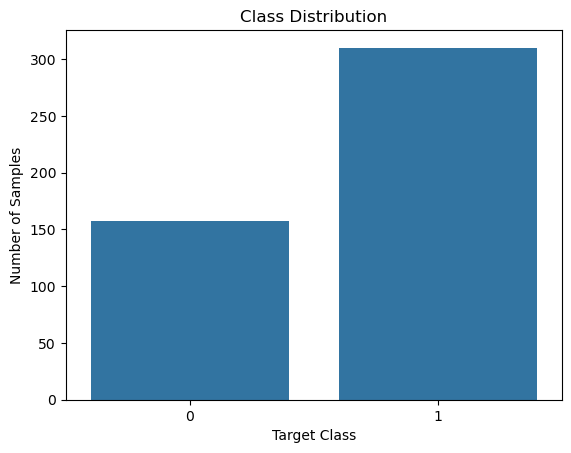

In [25]:
import seaborn as sns


# Check the class distribution of the 'target' column
class_distribution = data2['disease_status'].value_counts()
print(class_distribution)
sns.countplot(data=data2, x='disease_status')
plt.title('Class Distribution')
plt.xlabel('Target Class')
plt.ylabel('Number of Samples')
# Save to D drive (adjust the path as needed)
#plt.savefig('D:/Desktop/Thesis/heart disease/class.png',dpi=300)  # use forward slash `/` or double backslash `\\`
plt.show()


In [26]:

# Split into Alzheimer's group
ad_df = data2[data2['disease_status'] == 1]

# Split into Non-demented group
non_demented_df = data2[data2['disease_status'] == 0]

# Optional: Check counts
print("Alzheimer's group:", len(ad_df))
print("Non-demented group:", len(non_demented_df))

 #Save to separate files if needed
ad_df.to_csv("D:/Desktop/AD_Dataset/Gene_expression/GSE33000_Alzheimer's group.csv", index=False)
non_demented_df.to_csv("D:/Desktop/AD_Dataset/Gene_expression/GSE33000_non_demented_group.csv", index=False)


Alzheimer's group: 310
Non-demented group: 157


In [29]:
non_demented_df.shape

(157, 39282)

In [24]:
control=pd.read_csv("D:/Desktop/AD_Dataset/Gene_expression/GSE33000_non_demented_group.csv")
AD=pd.read_csv("D:/Desktop/AD_Dataset/Gene_expression/GSE33000_Alzheimer's group.csv")

In [25]:
AD.head()

,Sample,10019475365,10019481149,10019495284,10019687586,10019713746,10019799479,10019809115,10019874890,10019903058,...,10033669040,10033669041,10033669042,10033669043,10033669045,10033669046,10033669047,10033669048,10033669049,disease_status
0,GSM1423780,-0.016184,-0.017105,0.077440,0.033595,-0.001819,-0.065462,-0.042255,-0.000237,-0.051375,...,-0.005318,-0.081350,0.123740,0.104146,0.114913,0.024853,-0.062032,-0.068883,0.170841,1
1,GSM1423781,0.027599,-0.023574,-0.058746,0.032914,0.032487,0.016333,0.003896,0.026999,0.237243,...,0.045702,0.031939,0.027814,-0.010796,-0.219624,-0.001018,-0.042930,-0.072794,0.154764,1
2,GSM1423782,-0.089661,0.044863,-0.120759,-0.030928,-0.015073,-0.008490,0.005585,0.034198,0.291271,...,0.048495,-0.033006,0.089244,-0.031901,-0.205338,0.039534,-0.175094,-0.003799,0.359424,1
3,GSM1423783,-0.020493,0.003438,0.072692,-0.033051,-0.010303,-0.029326,-0.019656,0.023072,-0.023117,...,0.086333,-0.016658,0.011806,-0.027000,-0.065482,0.031740,-0.037869,-0.046252,0.203776,1
4,GSM1423784,-0.051699,-0.064108,-0.051002,-0.049156,0.063070,0.020476,-0.038470,0.035463,-0.152237,...,0.048858,-0.128627,0.041769,-0.036706,-0.085186,0.028517,-0.088991,0.010318,0.153241,1


In [26]:

# Step 2: Drop the 'disease_status' column
AD = AD.drop(columns=['disease_status'])

# Step 3: Set sample names as index (first column), then transpose
AD.set_index(AD.columns[0], inplace=True)  # Set first column (e.g., GSM1423780) as index
AD = AD.transpose()  # Transpose

# Step 4: Reset index to turn probe IDs into a column
AD.reset_index(inplace=True)
AD = AD.rename(columns={'index': 'ID_REF'})

# Step 5: Save or show
AD.to_csv("D:/Desktop/AD_Dataset/Gene_expression/AD_group_33000.csv", index=False)
AD.head()


Sample,ID_REF,GSM1423780,GSM1423781,GSM1423782,GSM1423783,GSM1423784,GSM1423785,GSM1423786,GSM1423787,GSM1423788,...,GSM1424080,GSM1424081,GSM1424082,GSM1424083,GSM1424084,GSM1424085,GSM1424086,GSM1424087,GSM1424088,GSM1424089
0,10019475365,-0.016184,0.027599,-0.089661,-0.020493,-0.051699,0.075485,-0.046606,0.111980,0.018505,...,0.063436,0.154526,0.136508,0.032624,-0.008130,0.041454,0.227960,0.131609,0.171959,0.081016
1,10019481149,-0.017105,-0.023574,0.044863,0.003438,-0.064108,-0.053226,-0.071823,-0.051699,-0.024906,...,0.093110,0.017701,0.059538,0.029554,-0.004030,0.014876,0.074505,0.062751,0.008906,-0.003973
2,10019495284,0.077440,-0.058746,-0.120759,0.072692,-0.051002,-0.183919,-0.074997,-0.090709,0.049640,...,0.105685,-0.135757,-0.083799,-0.080361,-0.128287,0.025462,-0.190268,0.001911,-0.069509,0.091989
3,10019687586,0.033595,0.032914,-0.030928,-0.033051,-0.049156,-0.011204,0.072451,0.126576,0.078031,...,0.172944,0.091314,0.005061,-0.100739,-0.055055,0.133694,-0.094849,0.005597,0.009747,0.047804
4,10019713746,-0.001819,0.032487,-0.015073,-0.010303,0.063070,0.113860,-0.055590,0.127236,0.056135,...,0.028127,0.165897,0.176577,0.178401,0.043441,0.138147,0.232495,0.049695,0.202760,0.131449


In [27]:
group1=pd.read_csv("D:/Desktop/AD_Dataset/Gene_expression/AD_group_33000.csv")


In [28]:
group1.head()

,ID_REF,GSM1423780,GSM1423781,GSM1423782,GSM1423783,GSM1423784,GSM1423785,GSM1423786,GSM1423787,GSM1423788,...,GSM1424080,GSM1424081,GSM1424082,GSM1424083,GSM1424084,GSM1424085,GSM1424086,GSM1424087,GSM1424088,GSM1424089
0,10019475365,-0.016184,0.027599,-0.089661,-0.020493,-0.051699,0.075485,-0.046606,0.111980,0.018505,...,0.063436,0.154526,0.136508,0.032624,-0.008130,0.041454,0.227960,0.131609,0.171959,0.081016
1,10019481149,-0.017105,-0.023574,0.044863,0.003438,-0.064108,-0.053226,-0.071823,-0.051699,-0.024906,...,0.093110,0.017701,0.059538,0.029554,-0.004030,0.014876,0.074505,0.062751,0.008906,-0.003973
2,10019495284,0.077440,-0.058746,-0.120759,0.072692,-0.051002,-0.183919,-0.074997,-0.090709,0.049640,...,0.105685,-0.135757,-0.083799,-0.080361,-0.128287,0.025462,-0.190268,0.001911,-0.069509,0.091989
3,10019687586,0.033595,0.032914,-0.030928,-0.033051,-0.049156,-0.011204,0.072451,0.126576,0.078031,...,0.172944,0.091314,0.005061,-0.100739,-0.055055,0.133694,-0.094849,0.005597,0.009747,0.047804
4,10019713746,-0.001819,0.032487,-0.015073,-0.010303,0.063070,0.113860,-0.055590,0.127236,0.056135,...,0.028127,0.165897,0.176577,0.178401,0.043441,0.138147,0.232495,0.049695,0.202760,0.131449


In [29]:
# Step 2: Drop the 'disease_status' column
control= control.drop(columns=['disease_status'])

# Step 3: Set sample names as index (first column), then transpose
control.set_index(control.columns[0], inplace=True)  # Set first column (e.g., GSM1423780) as index
control = control.transpose()  # Transpose

# Step 4: Reset index to turn probe IDs into a column
control.reset_index(inplace=True)
control = control.rename(columns={'index': 'ID_REF'})

# Step 5: Save or show
control.to_csv("D:/Desktop/AD_Dataset/Gene_expression/controll_group_33000.csv", index=False)
control.head()

Sample,ID_REF,GSM1424090,GSM1424091,GSM1424092,GSM1424093,GSM1424094,GSM1424095,GSM1424096,GSM1424097,GSM1424098,...,GSM1424237,GSM1424238,GSM1424239,GSM1424240,GSM1424241,GSM1424242,GSM1424243,GSM1424244,GSM1424245,GSM1424246
0,10019475365,0.092608,0.112060,-0.081613,0.038591,0.028289,0.046063,-0.003742,0.026093,0.041669,...,0.001105,0.046370,0.068043,0.203844,0.042579,0.018263,0.121809,-0.034938,0.073973,0.068453
1,10019481149,-0.010407,0.043736,-0.003229,-0.023437,0.017455,-0.029527,0.052397,0.054168,-0.020520,...,0.006312,0.021401,0.013530,0.029631,0.020914,0.014296,0.010552,-0.010118,0.017207,0.062803
2,10019495284,0.341444,-0.141009,0.038877,-0.052268,-0.099713,0.263897,-0.090135,-0.077761,0.262574,...,-0.188096,-0.234009,-0.210803,-0.304265,-0.169539,-0.173077,-0.258932,-0.159735,-0.182124,-0.267266
3,10019687586,-0.064256,0.159306,0.027908,-0.081050,0.042048,-0.021426,0.002208,0.115320,-0.028754,...,-0.056582,-0.032147,-0.034396,-0.123908,-0.012879,0.005083,-0.144517,-0.068259,-0.074872,-0.023523
4,10019713746,0.080661,0.164380,-0.088434,0.074738,0.011526,0.027268,-0.007963,-0.014597,0.007692,...,-0.013275,0.049071,0.059656,0.172214,0.024506,0.030127,0.085608,-0.009837,0.057851,0.059051


In [33]:
group0 = pd.read_csv("D:/Desktop/AD_Dataset/Gene_expression/controll_group_33000.csv")

In [ ]:
group0.head()